# Step 0: Importing Required Packages 

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier


# Step: 1: Importing data 

In [2]:
shopping = pd.read_csv('C:\\Users\\Krishna\\Desktop\\College\\Mini Project\\online_shoppers_intention.csv')
shopping.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
shopping.describe(include='all')


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


# Step 2: Data Preprocessing 

In [4]:
# Check for null values in data
nullcount = shopping.isnull().sum()
print('Total number of null values in dataset:', nullcount.sum())

Total number of null values in dataset: 0


In [5]:
# Checking for number of unique values for each feature

uniques = shopping.nunique(axis=0)
print(uniques)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


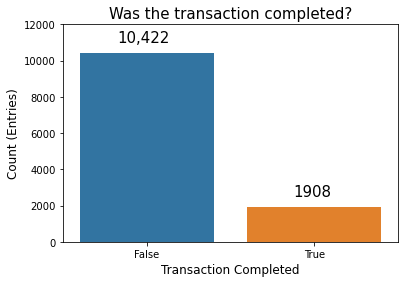

In [6]:
# Visualize the data

sns.countplot(shopping['Revenue'])
plt.ylim(0,12000)
plt.title('Was the transaction completed?', fontsize= 15)
plt.xlabel('Transaction Completed', fontsize=12)
plt.ylabel('Count (Entries)', fontsize=12)
plt.text(x=-.175, y=11000 ,s='10,422', fontsize=15)
plt.text(x=.875, y=2500, s='1908', fontsize=15)
plt.show()

#Feature Cleaning

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


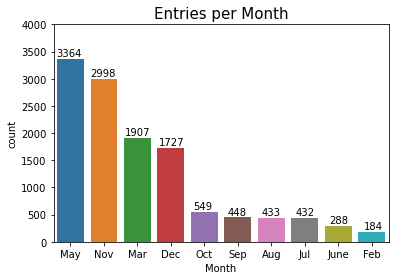

In [7]:
monthly = shopping['Month'].value_counts()

sns.countplot(shopping['Month'], order=monthly.index)
plt.title('Entries per Month', fontsize=15)
xval = -.42
plt.ylim(0,4000)

for index, value in monthly.items():
    plt.text(x=xval, y=value+50, s=str(value))
    xval += 1.02

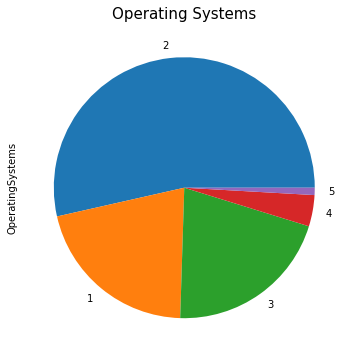

In [8]:
shopping['OperatingSystems'] = shopping['OperatingSystems'].replace([5,6,7,8],5)
os_plot = shopping['OperatingSystems'].value_counts().plot.pie(figsize=(6,6))
plt.title('Operating Systems', fontsize=15)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


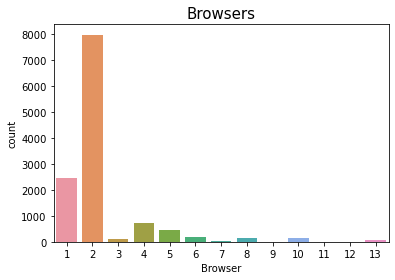

In [9]:
sns.countplot(shopping['Browser'])
plt.title('Browsers', fontsize=15)
plt.show()

In [10]:
# Removing unneccessary columns from data: shopping_clean

shopping_clean = shopping.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend'], axis=1)
shopping_clean.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,VisitorType,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Returning_Visitor,False


# Label and one hot encoding

In [11]:
# Encoding Vistor Type

visitor_encoded = pd.get_dummies(shopping_clean['VisitorType'], prefix='Visitor_Type', drop_first = True)

shopping_clean_merged = pd.concat([shopping_clean, visitor_encoded], axis=1).drop(['VisitorType'], axis=1)

shopping_clean_merged.describe(include='all')




,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue,Visitor_Type_Other,Visitor_Type_Returning_Visitor
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10422,NaN,NaN
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,0.006894,0.855718
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.082745,0.351390
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,0.000000,1.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,0.000000,1.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,0.000000,1.000000


# Split train and test data

In [32]:
# Split train and test data

X = shopping_clean_merged.drop('Revenue', axis=1)
y = shopping_clean_merged['Revenue']
X.head()
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2, test_size=.2)


(       Administrative  Administrative_Duration  Informational  \
 3566                0                   0.0000              0   
 50                  0                   0.0000              0   
 5378                0                   0.0000              0   
 174                 5                  41.3000              0   
 9061                2                  19.0000              0   
 ...               ...                      ...            ...   
 1882                0                   0.0000              0   
 11039               0                   0.0000              0   
 1711                1                  26.0000              1   
 1668                0                   0.0000              0   
 10967               2                  44.3125              2   
 
        Informational_Duration  ProductRelated  ProductRelated_Duration  \
 3566                      0.0               1                 0.000000   
 50                        0.0               1          

# Naive Bayes Classifier

In [19]:
# Fit Gaussian Naive Bayes Classifier to our training data
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

# Make prediction using our test data and model
y_pred = gnb.predict(X_test) 

# Comparing our prediction to response values
print("Gaussian Naive Bayes model accuracy(in %):", round(metrics.accuracy_score(y_test, y_pred)*100,2))

Gaussian Naive Bayes model accuracy(in %): 84.63


# Random Forest Classifier

In [20]:
# Fit Random Forest Classifier to our Training Data
rfc = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc.fit(X_train, y_train)

# make prediction using our test data and model
y_pred_rfc = rfc.predict(X_test)
y_prob_rfc = rfc.predict_proba(X_test)[:, 1]

# Comparing our prediciton to response values
print('Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_rfc)*100,2))

Random Forest Classifier model accuracy(in %): 90.23


# Fit Extra Trees Classifier to our Training Data

In [21]:
# Fit Extra Trees Classifier to our Training Data
etc = ExtraTreesClassifier(random_state=2, n_estimators=1000)
etc.fit(X_train, y_train)

# make prediction using our test data and model
y_pred_etc = etc.predict(X_test)
y_prob_etc = etc.predict_proba(X_test)[:, 1]

# Comparing our prediciton to response values
print('Extra Trees Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_etc)*100,2))

Extra Trees Classifier model accuracy(in %): 89.5


# Feature Importance

In [28]:
importances = rfc_stratified.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc_stratified.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train_stratified.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. Feature 8 (0.693368)
2. Feature 7 (0.086168)
3. Feature 5 (0.058875)
4. Feature 6 (0.042850)
5. Feature 4 (0.040776)
6. Feature 1 (0.022842)
7. Feature 0 (0.020969)
8. Feature 11 (0.017604)
9. Feature 3 (0.008162)
10. Feature 2 (0.005109)
11. Feature 9 (0.003008)
12. Feature 10 (0.000269)


In [29]:
# Generating a dataframe for our feature importance

col_names = pd.Series([col for col in X_train_stratified.columns])

importance_df = pd.DataFrame(importances)
importance_df.rename(columns={0:'Importance'}, inplace=True)
importance_df.set_index(col_names,inplace=True)

imp_sorted = importance_df.sort_values(by='Importance', ascending=False)
imp_sorted

,Importance
PageValues,0.693368
ExitRates,0.086168
ProductRelated_Duration,0.058875
BounceRates,0.042850
ProductRelated,0.040776
Administrative_Duration,0.022842
Administrative,0.020969
Visitor_Type_Returning_Visitor,0.017604
Informational_Duration,0.008162
Informational,0.005109


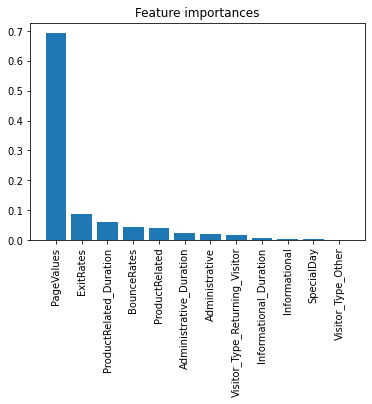

In [30]:
plt.title("Feature importances")
plt.bar(range(X_train_stratified.shape[1]),importances[indices])
plt.xticks(range(X_train_stratified.shape[1]), imp_sorted.index, rotation=90)
plt.xlim([-1, X_train_stratified.shape[1]])
plt.show()